# Visualizing Earnings from 2012 Majors


## Introduction 

####  Data about employment and earnings from 2012 graduates of various majors were obtained from this [dataset](https://github.com/fivethirtyeight/data/tree/master/college-majors). It was pre-cleaned by Five Thirty Eight, and it hails from the  American Community Survey 2010-2012 Public Use Microdata Series. The first objective for this project was to train skills in visualizing data using matplotlib. The second was to answer questions on the data via visualizations. Besides choosing a few of these questions for myself, if the answers to questions 5 and 6 provided much insight, I would explore the gender divide a little bit further.

#### 1)  What are some overall impressions gleaned from the data's distribution?

#### 2)  Do students in more popular majors make more money?

#### 3)  Is there any link between the number of full-time employees and median salary?

#### 4)  What patterns can be revealed from the relationship amongst total, median wage and unemployment rate?

#### 5)  Are the unemployment rates higher for jobs from majority female majors?

#### 6)  Do students that majored in subjects that were majority female make more money?

## Summary of Results

#### The exploration of the findings revealed initial and general impressions, patterns and lack of patterns in earnings, and a broader picture of the gender divide. As for the general impressions, the following three were notable. Most of majors had corresponding median wages hovering near 40,000 dollars, female ratios between 0.3 to 0.4 and between 0.6 and 0.8, and unemployment rates mostly between 5% and 10%. 

#### As for earnings, the least popular majors led to the highest earning jobs. For example, Petroleum Engineering's 110,000 median wage was the peak value. However, some of the most popular majors, with student populations over 50,000, led to incomes above 40,000 dollars in median wage. In contrast, no obvious patterns were present between median wage and full time or part time status or amongst median wage, number of people employed from their given major and unemployment rate. 

#### Unlike the factors seemingly less related to earnings, a relationship did exist with gender. A gap manifests near 60,000 dollars of median wage and onwards, where the jobs become much more male dominant. In addition, the female ratios often fell below 0.4 or 40% for these majors. This was best exemplified when comparing the top five majors that led to the highest earning jobs versus the lowest five majors who led to the least earning jobs. The top five majors were high earners and preodominantly male, consistently double or more the amount of females. In contrast, the lowest five majors were predominantly female and lowest in median wage. In summary, there definitely was a gender divide worth exploring.

In [30]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [31]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]
#To see a record of this set in order to get ideas 
#about how to work with the data

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [32]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [33]:
#To observe record structure
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [34]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [35]:
#To improve accuracy of dataframe.describe()
#172 vs. 173 difference of rows was observed 
#in a previous block

raw_data_count = recent_grads.count().max()
recent_grads = recent_grads.dropna(axis = 0)
cleaned_data_count = recent_grads.count().max()
print('# of rows : ', raw_data_count,'\n' 
      '# of rows after cleaning : ', cleaned_data_count, '\n'
      '# of rows removed :', raw_data_count -  cleaned_data_count)

# of rows :  173 
# of rows after cleaning :  172 
# of rows removed : 1


In [36]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Exploring Findings

### Getting Overall Impressions from the Data : Histograms

#### By observing the records displayed in the previous blocks, I selected a few columns for which creating histograms would be beneficial to generate  distributions. The columns are 'Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women'.

Text(0, 0.5, 'Distribution')

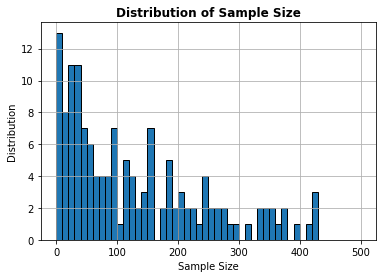

In [37]:
recent_grads['Sample_size'].hist(bins = 50, 
                                 range = (0,500), edgecolor = 'black')

plt.title('Distribution of Sample Size', fontweight = 'bold', fontsize = 12)

plt.xlabel('Sample Size', fontsize = 10)

plt.ylabel('Distribution', fontsize = 10)

Text(0, 0.5, 'Distribution')

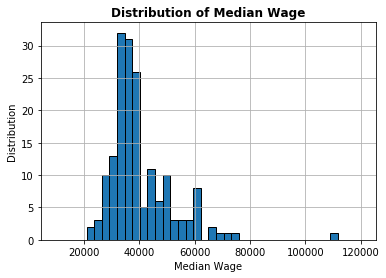

In [38]:
recent_grads['Median'].hist(bins = 40, range = (10000,120000),edgecolor = 'black')

plt.title('Distribution of Median Wage', fontweight = 'bold', fontsize = 12)

plt.xlabel('Median Wage', fontsize = 10)

plt.ylabel('Distribution', fontsize = 10)

Text(0, 0.5, 'Distribution')

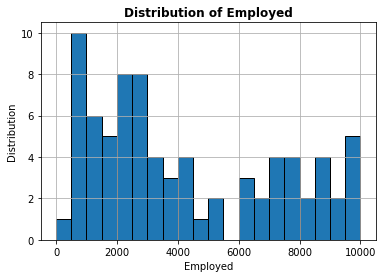

In [39]:
recent_grads['Employed'].hist(bins = 20, range = (0,10000),edgecolor = 'black')

plt.title('Distribution of Employed', fontweight = 'bold', fontsize = 12)

plt.xlabel('Employed', fontsize = 10)

plt.ylabel('Distribution', fontsize = 10)

Text(0, 0.5, 'Distribution')

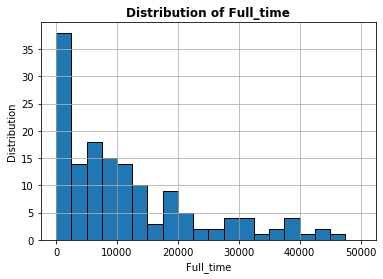

In [40]:
recent_grads['Full_time'].hist(bins = 20, range = (0, 50000),edgecolor = 'black')

plt.title('Distribution of Full_time', fontweight = 'bold', fontsize = 12)

plt.xlabel('Full_time', fontsize = 10)

plt.ylabel('Distribution', fontsize = 10)

Text(0, 0.5, 'Distribution')

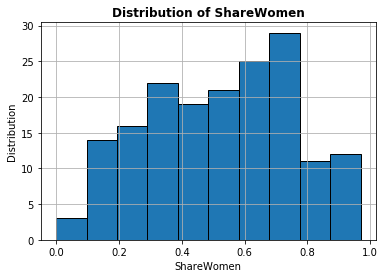

In [41]:
recent_grads['ShareWomen'].hist(edgecolor = 'black')

plt.title('Distribution of ShareWomen', fontweight = 'bold', fontsize = 12)

plt.xlabel('ShareWomen', fontsize = 10)

plt.ylabel('Distribution', fontsize = 10)

Text(0, 0.5, 'Distribution')

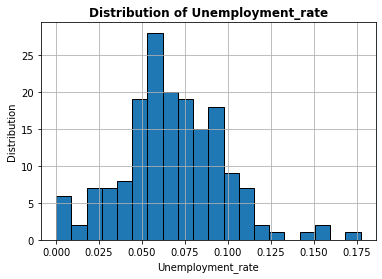

In [42]:
recent_grads['Unemployment_rate'].hist(bins = 20,edgecolor = 'black')

plt.title('Distribution of Unemployment_rate', fontweight = 'bold', fontsize = 12)

plt.xlabel('Unemployment_rate', fontsize = 10)

plt.ylabel('Distribution', fontsize = 10)

Text(0, 0.5, 'Distribution')

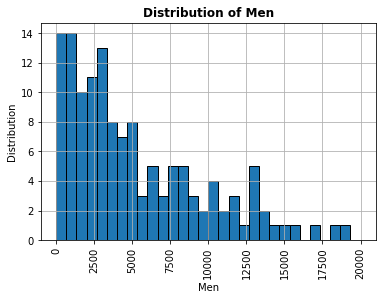

In [43]:
recent_grads['Men'].hist(bins = 30, range = (0,20000), xrot = 90,edgecolor = 'black')

plt.title('Distribution of Men', fontweight = 'bold', fontsize = 12)

plt.xlabel('Men', fontsize = 10)

plt.ylabel('Distribution', fontsize = 10)

Text(0, 0.5, 'Distribution')

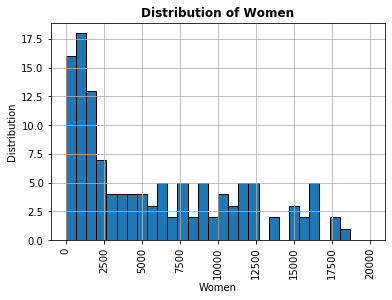

In [44]:
recent_grads['Women'].hist(bins = 30, range = (0,20000), xrot=90,edgecolor = 'black')

plt.title('Distribution of Women', fontweight = 'bold', fontsize = 12)

plt.xlabel('Women', fontsize = 10)

plt.ylabel('Distribution', fontsize = 10)

#### The distributions have revealed some interesting commonalities: 

#### 1) Most of the sample sizes in this set have a size under 50 or a size between 100 and 200. 

#### 2) Most of the median wages for jobs of these majors hover near 40,000 dollars. 

#### 3) The majors led to jobs numbering around an amount often below 4,000. 

#### 4) Most majors had a 'ShareWomen' ratio from 0.3 to 0.4 and 0.6 to 0.8. 

#### 5) Most majors face an unemployment rate between 5% and 10% with the most frequent between 5% to 7.5%. 

#### 6) Most majors had their male and female groups numbering below 5,000; however, the female counterparts had other moderate percentages between the 5,000 and 15,000 mark.

### Answering Specific Questions About Earning Patterns

### Do students in more popular majors make more money?

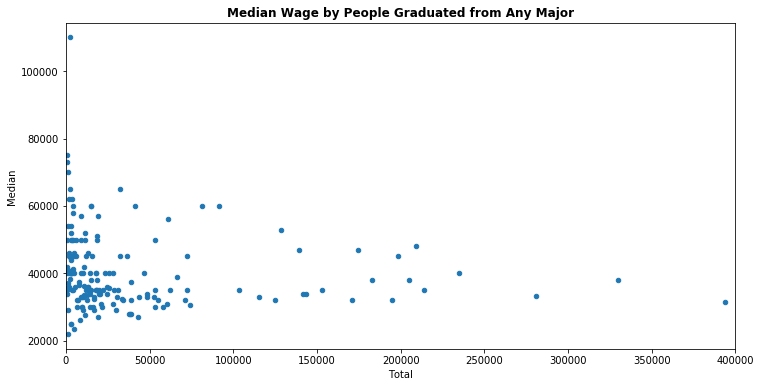

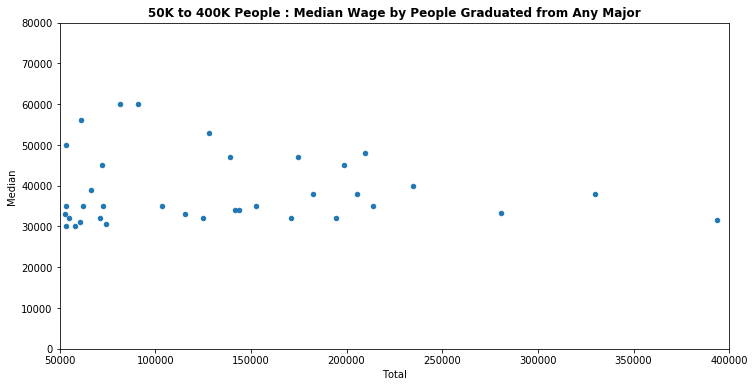

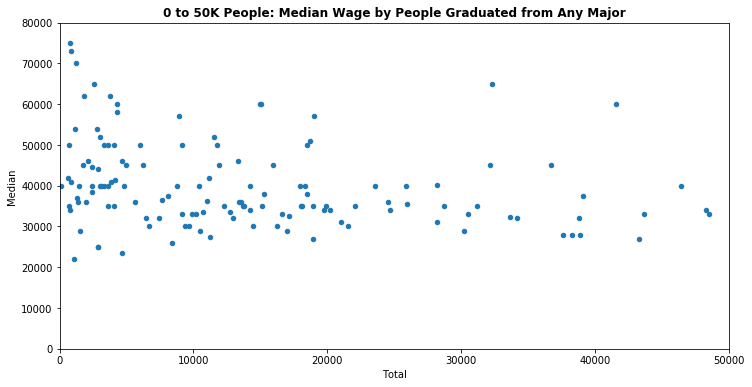

In [45]:
#This first plot is to view all in perspective.

(recent_grads.plot(x = 'Total', y = 'Median', 
                   kind = 'scatter', xlim = (0,400000), figsize = (12,6)))

plt.title('Median Wage by People Graduated from Any Major', fontweight ='bold', fontsize = 12)

#The following is to focus on the most popular majors.

(recent_grads.plot(x = 'Total', y = 'Median', 
                   kind = 'scatter', xlim = (50000,400000), ylim = (0,80000), figsize = (12,6)))

plt.title('50K to 400K People : Median Wage by People Graduated from Any Major', fontweight ='bold', fontsize = 12)


#In contrast, this is to focus on the less popular majors.

(recent_grads.plot(x = 'Total', y = 'Median', 
                   kind = 'scatter', xlim = (0,50000), ylim = (0,80000), figsize = (12,6)))

plt.title('0 to 50K People: Median Wage by People Graduated from Any Major', fontweight ='bold', fontsize = 12)


plt.show()

#### The answer is No. The majors with a total below 10,000 have high performers earning quite a bit beyond 60,000 dollars with one especially peaking at a median salary of 110,000.

#### However, the graph was plotted thrice at different resolutions to draw an additional conclusion. The most popular majors, potentially identifiable at 50,000 and higher, are making money between 30,000 and roughly 60,000 dollars (2nd graph). Similarly, the less populated majors often plotted between the same dollar amounts (3rd graph). On the other hand, in sheer numbers, this means that those majors contained a higher overall number of people earning these salaries, which is very significant. In other words, it is not trivial to ignore the impact of a major that typically leads to 200,000 jobs where the median salary is 50,000 dollars; this case scenario taken from the chart is difficult to compare to a major that leads to the same salary but a total of 10,000 jobs. The impact is considerably different. In conclusion, although the answer may be 'No', there are majors that lead to more jobs, and therefore more people have access to this amount of income.

### Is there any link between the number of full-time employees and median salary?

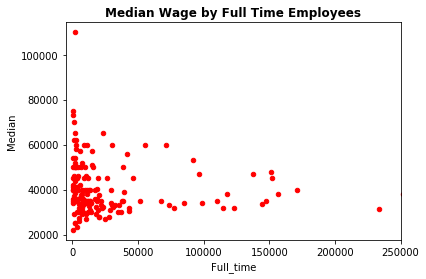

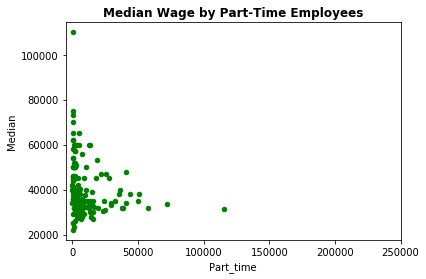

In [46]:
#Overlapping the plots produces too diminishes the ability to distinguish values from each group.
#This is why they are done separately. Otherwise, it falsely appears that one is doing better than another.

(recent_grads.plot(x = 'Full_time', y = 'Median', 
                   kind = 'scatter', title = 'Median Wage by Full Time Employees',
                   xlim = (-5000,250000),color = 'red'))

plt.title('Median Wage by Full Time Employees', fontweight = 'bold', fontsize = 12)

(recent_grads.plot(x = 'Part_time', y = 'Median', 
                   kind = 'scatter', title = 'Median Wage by Part-Time Employees', 
                   xlim = (-5000,250000), color = 'green'))

plt.title('Median Wage by Part-Time Employees', fontweight = 'bold', fontsize = 12)

plt.show()



#### No, there is no meaningful link. They earn very similarly all across the spectrum. What can be observed, however, is the higher number of full time employees (50,000 and up) who are earning somewhere between 30,000 and 60,000 dollars.

### What patterns can be revealed from the relationship amongst total, median wage and unemployment rate?

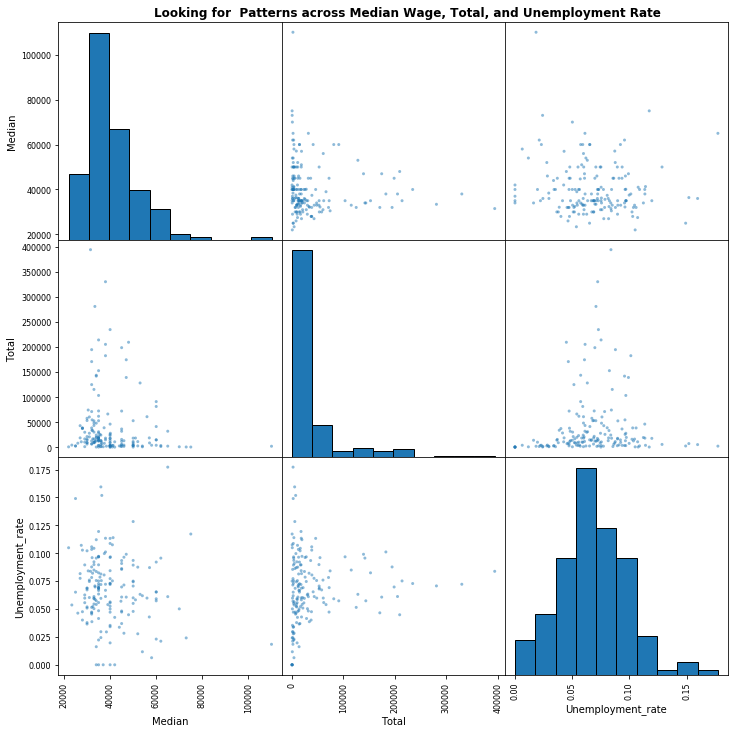

In [47]:

(scatter_matrix(recent_grads[['Median', 'Total', 'Unemployment_rate']], figsize = (12,12), 
               range_padding = 0.1, hist_kwds = {'bins': 10,'edgecolor':'black'}))

(plt.title('Looking for  Patterns across Median Wage, Total, and Unemployment Rate', loc = 'right', 
          position = (0.7,3), fontweight='bold', fontsize = 12))

plt.show()


#### Most majors earn near the 40,000 dollar mark (first row's histogram), and most of them have a unemployment rate between 5% and 10% (third row's histogram). When the unemployment rate is between 5% and 10%, majors that earn near or at that wage are the strong majority (first row's last scatter plot). This is further validated with the third row's first scatter plot, where some majors even peak above 15% of unemployment rate. In addition, majors with the highest number of employed people have unemployment rates in these ranges (second row's third scatter plot). In other words,  unemployment rates do not seem to show a specific tendency in respect to median wage and number of people employed in their fields. 

### Are the unemployment rates higher for jobs  from majority female majors?

Text(0.5, 1.0, 'Unemployment Rates by Share Women Ratios')

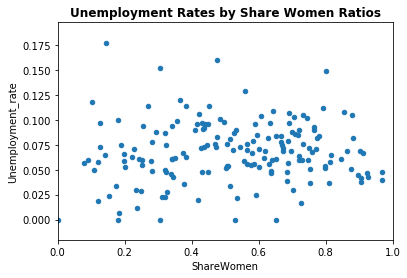

In [48]:
(recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter', xlim = (0,1)))

plt.title('Unemployment Rates by Share Women Ratios', fontweight = 'bold', fontsize = '12')

#### An interesting correlation shows itself here. Majors with a 'sharewomen' ratio between 0.5 and 1 had an unemployment rate hovering mostly between 5% and 10% of unemployment. In contrast, majors with a lower ratio of 'sharewomen' saw similar yet slightly lower rates, with a few more majors having rates near 0%. Overall, the  unemployment rates are similar, regardless of the 'sharewomen' ratio. 

### Do students that majored in subjects that were majority female make more money?

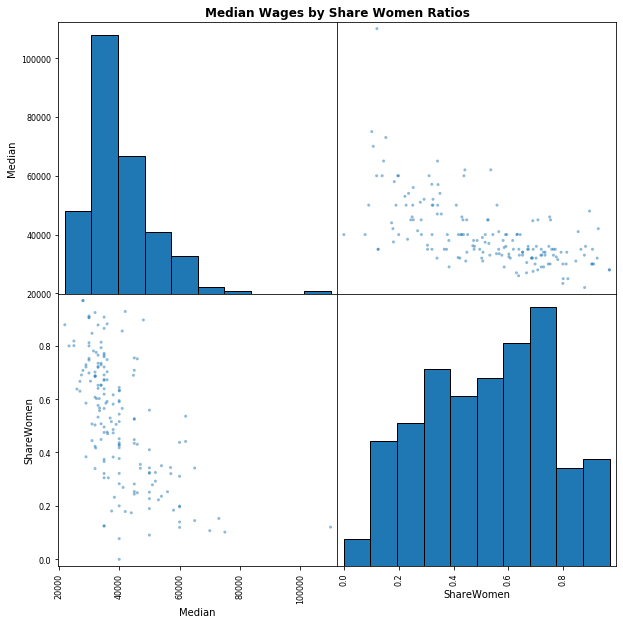

In [49]:
scatter_matrix(recent_grads[['Median','ShareWomen']], figsize = (10,10),hist_kwds = {'edgecolor':'black'})

plt.title('Median Wages by Share Women Ratios', loc = 'center', position = (0,2), fontweight='bold', fontsize = 12)

plt.show()

#### No, they do not. The first histogram shows that most people have a wage in a range near 40,000 dollars, and the second shows that a high number of majors are majority female. Therefore, it follows most women as well will earn wages in this range. In addition, both scatter plots show that a "ShareWomen" of 0.6 and higher earned less. Inversely, the ones with less women in the ratio, specially 0.4 and below, earned more (particularly visualized in the second column's scatter plot). This divide is clear enough to justify exploring this a bit further. 

### Who earns more? Men or Women?

Text(-0.5, 3, 'Exploring a divide : Median Wages for Men and Women')

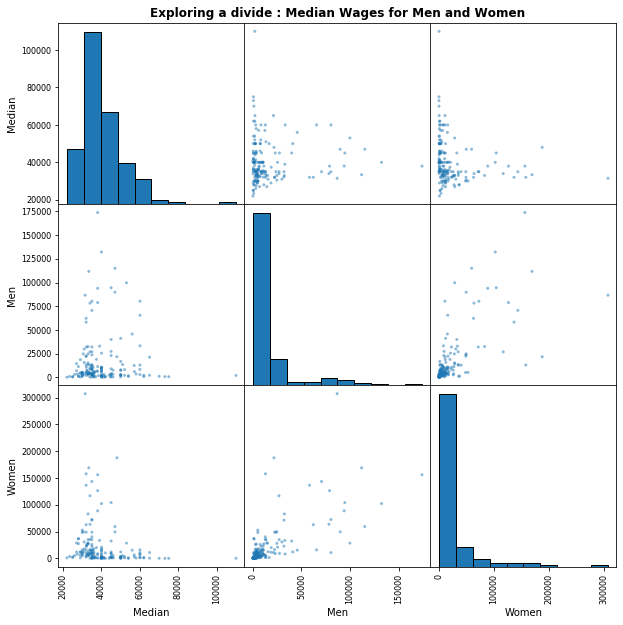

In [50]:
scatter_matrix(recent_grads[['Median', 'Men', 'Women']], figsize = (10,10), range_padding = (0.1),hist_kwds = {'edgecolor':'black'})
plt.title('Exploring a divide : Median Wages for Men and Women', loc = 'center', position = (-0.5,3), fontweight='bold', fontsize = 12)

#### In an overall sense, it can be said that men earn more money than women. In the two scatter plots of the first column, more men earning in the 60,000 dollar range can be observed in comparison to the women. However, since the bulk of people earn median wages near the 40,000 dollar range (first row's histogram), both men and women have extremely similar results in those ranges (first row's scatter plots). Although it is small, a gap manifests near 60,000 dollar range and onwards, also validated by the previous chart's demonstration of higher median wages paired with smaller ratios of 'ShareWomen'. What I want to explore a bit further is the difference in these ratios. How does the divide look when comparing the top earning majors versus the lowest earning majors?

### How does the amount of women per major change when comparing the top 5 paying majors versus the lowest 5 paying?

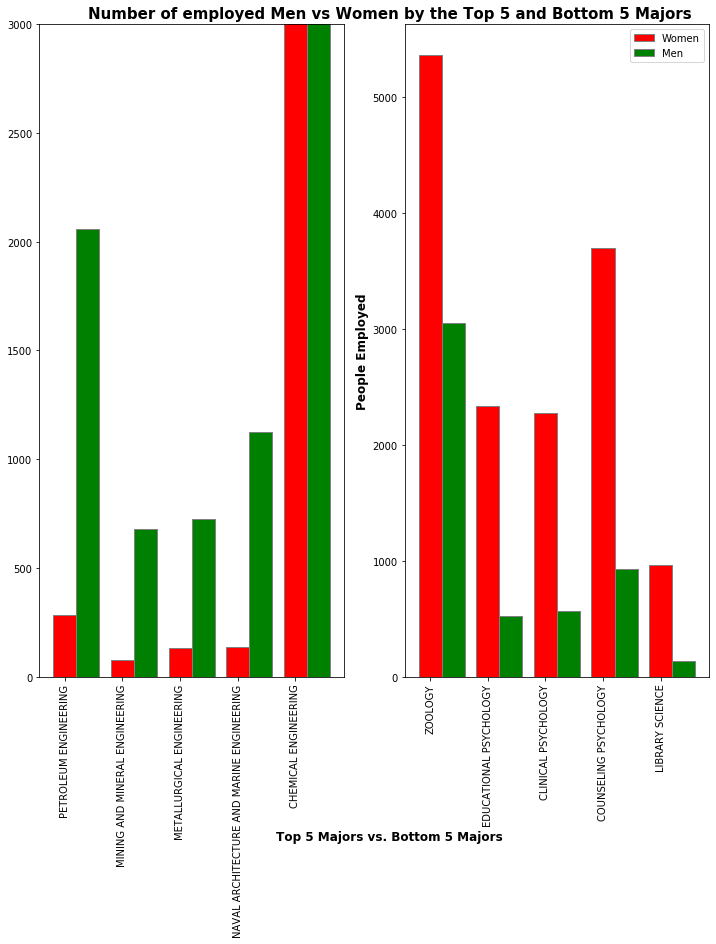

In [51]:
from numpy import arange

# set width of bar 
bar_width = 0.4
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#The heights and labels of the bars
top_5_women = recent_grads[:5]['Women']
top_5_men = recent_grads[:5]['Men'] 
top_5_labels = recent_grads[:5]['Major']

bottom_5_women = recent_grads[-5:]['Women']
bottom_5_men = recent_grads[-5:]['Men'] 
bottom_5_labels = recent_grads[-5:]['Major']


# Set position of bar on X axis
br1 = arange(len(top_5)) #Will work for second subplot because the number of elements is the same
br2 = [x + bar_width for x in br1] 
tick_positions = range(0,5)

#The first subplot

ax1.bar(br1, top_5_women, color ='r', width = bar_width, edgecolor ='grey', label ='Women') 

ax1.bar(br2, top_5_men, color ='g', width = bar_width, edgecolor ='grey', label ='Men') 

ax1.set_xticks(tick_positions)

ax1.set_xticklabels(top_5_labels, rotation = 'vertical')

ax1.set_ylim(0,3000) #Chemical Engineering exceeds 10,000 for women and 20,000 for men, so the resolution 

                     #of the figure was increased to gauge the difference in lower values for the other majors.
    

#The second subplot


ax2.bar(br1, bottom_5_women, color ='r', width = bar_width, edgecolor = 'grey', label = 'Women')

ax2.bar(br2, bottom_5_men, color ='g', width = bar_width, edgecolor = 'grey', label = 'Men')

ax2.set_xticks(tick_positions)

ax2.set_xticklabels(bottom_5_labels, rotation = 'vertical')


#Finish

plt.xlabel('Top 5 Majors vs. Bottom 5 Majors', x = -0.05, y = 0.9, fontweight ='bold', fontsize = 12) 

plt.ylabel('People Employed', fontweight ='bold', fontsize = 12) 

plt.title('Number of employed Men vs Women by the Top 5 and Bottom 5 Majors', x = -0.05, fontweight ='bold', fontsize = 15)


plt.legend()

plt.show()






#### The visualizations of the findings help validate some inferences observed previously. In the very top median wages, although there were women earning in those categories, there was a smaller number of them earning in that range in comparison to a much larger group of men, a behavior observed across all the top 5 earning majors. Although the Chemical Engineering major has 11,000+ women, the number of men is 20,000+, and the median wage is 65,000 dollars; in contrast, that wage trails very much below the very male-centric Petroleum Engineering's 110,000 median wage. In addition, the lowest earning majors are predominantly female, so there is a visible divide, according to these findings.

## Conclusion

#### Employment and earning data for graduates of various majors from 2012 was obtained for data analysis. At the beginning of the exploration, some things were quickly learned about the median wage, the female ratio in the majors,  and the unemployment rates. Firstly, most of the median wages hovered near 40,000 dollars. Secondly, the most female ratios in the majors were between 0.3 to 0.4 and 0.6 and 0.8. Thirdly, the unemployment rate was mostly between 5% and 10%. 

#### Focusing on the earnings specifically, a few aspects came to light. The least popular majors led to the highest earning jobs, where Petroleum Engineering's 110,000 median wage was the peak. Nevertheless, very few of the most popular majors led to incomes above 40,000 dollars in median wage. In addition, no discernable patterns were revealed between median wage and full time or part time status or amongst median wage, number of people employed from their given major and unemployment rate. However, there was a relationship between gender and earnings.

#### Lastly, the visualizations of the data revealed a gender divide. Jobs with a lower ratio of women earned much more than their predominantly female counterparts. According to the data, the gap becomes most visible near 60,000 dollars and onwards, where there are more men in those majors and female ratios below 0.4. This finding was particularly captured in the last graph comparing the five majors that led to the highest earning jobs versus the five majors that led to the lowest . In all the top 5, the amount of men in the major are double or more the amount of women. In contrast, the opposite is true for the five lowest earning majors where those are predominantly female. In summary, findings about earnings and the gender divide were the most prominent insights gathered. 